In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [21]:

# Define the column names for the DataFrame
column_names = ['Time', 'Query_time', 'CPU', 'Memory', 'Ping']

# Read the lines from the text file
with open('network/DDoS_NS_dnsperf.txt', 'r') as file:
    lines = file.readlines()

# Initialize an empty list to store the extracted data
data = []

# Parse each line and extract the relevant information using regular expressions
for line in lines:
    match = re.match(r'(\d+:\d+:\d+); Query_time: (\d+); CPU: ([\d.]+)%%; Memory: (\d+)G?; Ping: ([\d.]+)', line)
    if match:
        data.append(match.groups())

# Create a DataFrame from the extracted data
df = pd.DataFrame(data, columns=column_names)
df['Query_time'] = df['Query_time'].astype(int)
df['Memory'] = df['Memory'].astype(int)
df['CPU'] = df['CPU'].astype(float)
df['Ping'] = df['Ping'].astype(float)
# Assuming 'df' is your DataFrame with the desired column named 'Time' as a datetime column
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['T'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds()
df['Time'] = df['Time'].dt.strftime('%H:%M:%S')

# Set the 'Time' column as the index of the DataFrame
df.set_index('T', inplace=True)

# Display the DataFrame
print(df)


           Time  Query_time   CPU  Memory    Ping
T                                                
0.0    15:47:22          26  6.77      14   4.312
2.0    15:47:24           5  8.29      14   5.805
4.0    15:47:26          25  5.69      14   3.186
6.0    15:47:28           4  6.80      14   4.672
7.0    15:47:29           4  4.55      14   2.901
...         ...         ...   ...     ...     ...
233.0  15:51:15           8  4.47      14   3.475
235.0  15:51:17           7  6.99      14   8.508
236.0  15:51:18          16  5.10      14  16.473
238.0  15:51:20           8  5.12      14   3.575
240.0  15:51:22          11  5.88      14   6.740

[112 rows x 5 columns]


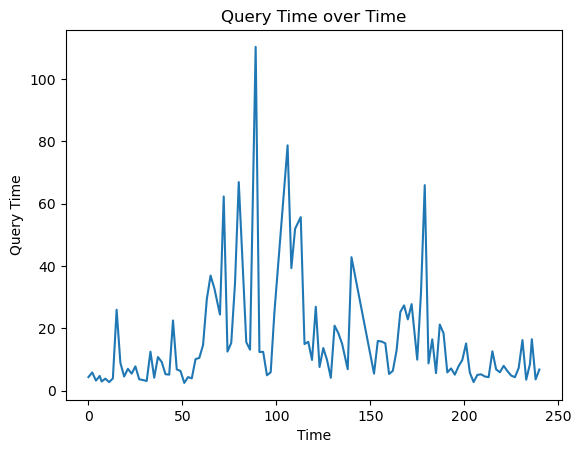

In [23]:
# Plot the desired column as a time series
df['Ping'].plot()

# Set plot title and labels
plt.title('Query Time over Time')
plt.xlabel('Time')
plt.ylabel('Query Time')

# Display the plot
plt.show()